<a href="https://colab.research.google.com/github/drzasrly/FuzzyLogicCuaca/blob/main/FuzzyLogicCuaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


temperatur = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatur')
kelembapan = ctrl.Antecedent(np.arange(0, 101, 1), 'kelembapan')
cuaca = ctrl.Consequent(np.arange(0, 11, 1), 'cuaca')

temperatur['dingin'] = fuzz.trapmf(temperatur.universe, [0, 0, 10, 20])
temperatur['hangat'] = fuzz.trimf(temperatur.universe, [15, 25, 35])
temperatur['panas'] = fuzz.trapmf(temperatur.universe, [30, 35, 40, 40])

kelembapan['rendah'] = fuzz.trapmf(kelembapan.universe, [0, 0, 30, 50])
kelembapan['sedang'] = fuzz.trimf(kelembapan.universe, [40, 60, 80])
kelembapan['tinggi'] = fuzz.trapmf(kelembapan.universe, [70, 85, 100, 100])

cuaca['hujan'] = fuzz.trapmf(cuaca.universe, [0, 0, 2, 4])
cuaca['mendung'] = fuzz.trimf(cuaca.universe, [3, 5, 7])
cuaca['cerah'] = fuzz.trapmf(cuaca.universe, [6, 8, 10, 10])

rule1 = ctrl.Rule(temperatur['dingin'] & kelembapan['tinggi'], cuaca['hujan'])
rule2 = ctrl.Rule(temperatur['hangat'] & kelembapan['sedang'], cuaca['mendung'])
rule3 = ctrl.Rule(temperatur['panas'] & kelembapan['rendah'], cuaca['cerah'])
rule4 = ctrl.Rule(kelembapan['tinggi'], cuaca['hujan'])

cuaca_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
cuaca_simulasi = ctrl.ControlSystemSimulation(cuaca_ctrl)

try:
    temperatur_input = float(input("Masukkan nilai temperatur (0-40°C): "))
    kelembapan_input = float(input("Masukkan nilai kelembapan (0-100%): "))

    if not (0 <= temperatur_input <= 40):
        raise ValueError("Nilai temperatur harus dalam rentang 0-40°C.")
    if not (0 <= kelembapan_input <= 100):
        raise ValueError("Nilai kelembapan harus dalam rentang 0-100%.")

    cuaca_simulasi.input['temperatur'] = temperatur_input
    cuaca_simulasi.input['kelembapan'] = kelembapan_input

    cuaca_simulasi.compute()

    hasil_cuaca = cuaca_simulasi.output['cuaca']
    if hasil_cuaca <= 4:
        deskripsi_cuaca = "Hujan"
    elif 4 < hasil_cuaca <= 7:
        deskripsi_cuaca = "Mendung"
    else:
        deskripsi_cuaca = "Cerah"

    print(f"\nPrediksi cuaca (0=hujan, 10=cerah): {hasil_cuaca:.2f}")
    print(f"Kondisi cuaca: {deskripsi_cuaca}")

except ValueError as e:
    print(f"Input tidak valid: {e}")


Masukkan nilai temperatur (0-40°C): 20
Masukkan nilai kelembapan (0-100%): 60

Prediksi cuaca (0=hujan, 10=cerah): 5.00
Kondisi cuaca: Mendung


In [1]:
!pip install matplotlib

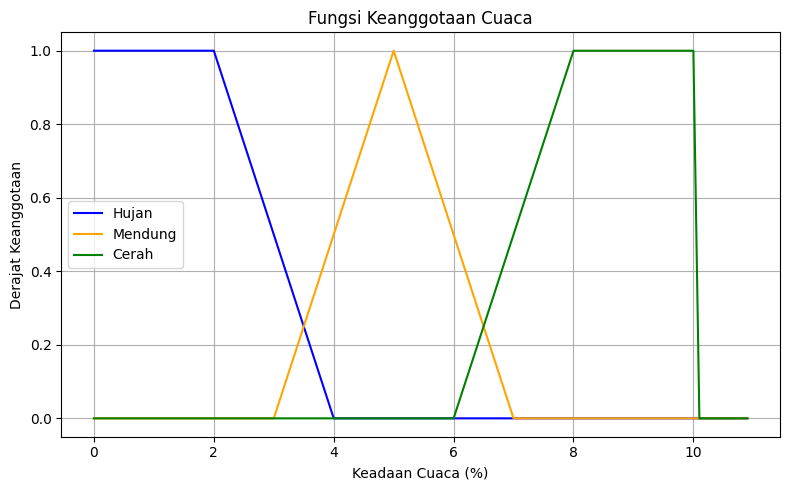

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi keanggotaan untuk Temperatur
temperatur = np.arange(0, 41, 1)
dingin = np.piecewise(temperatur, [temperatur <= 10, (temperatur > 10) & (temperatur <= 20), temperatur > 20],
                      [1, lambda x: (20 - x) / (20 - 10), 0])
hangat = np.piecewise(temperatur, [(temperatur >= 15) & (temperatur <= 25), (temperatur > 25) & (temperatur <= 35)],
                      [lambda x: (x - 15) / (25 - 15), lambda x: (35 - x) / (35 - 25)])
panas = np.piecewise(temperatur, [(temperatur >= 30) & (temperatur <= 35), (temperatur > 35) & (temperatur <= 40)],
                     [lambda x: (x - 30) / (35 - 30), 1])

# Fungsi keanggotaan untuk Kelembapan
kelembapan = np.arange(0, 101, 1)
rendah = np.piecewise(kelembapan, [kelembapan <= 30, (kelembapan > 30) & (kelembapan <= 50), kelembapan > 50],
                      [1, lambda x: (50 - x) / (50 - 30), 0])
sedang = np.piecewise(kelembapan, [(kelembapan >= 40) & (kelembapan <= 60), (kelembapan > 60) & (kelembapan <= 80)],
                      [lambda x: (x - 40) / (60 - 40), lambda x: (80 - x) / (80 - 60)])
tinggi = np.piecewise(kelembapan, [(kelembapan >= 70) & (kelembapan <= 85), (kelembapan > 85) & (kelembapan <= 100)],
                      [lambda x: (x - 70) / (85 - 70), 1])

# Fungsi keanggotaan untuk Cuaca
cuaca = np.arange(0, 11, 0.1)
hujan = np.piecewise(cuaca, [cuaca <= 2, (cuaca > 2) & (cuaca <= 4), cuaca > 4],
                     [1, lambda x: (4 - x) / (4 - 2), 0])
mendung = np.piecewise(cuaca, [(cuaca >= 3) & (cuaca <= 5), (cuaca > 5) & (cuaca <= 7)],
                       [lambda x: (x - 3) / (5 - 3), lambda x: (7 - x) / (7 - 5)])
cerah = np.piecewise(cuaca, [(cuaca >= 6) & (cuaca <= 8), (cuaca > 8) & (cuaca <= 10)],
                     [lambda x: (x - 6) / (8 - 6), 1])

# Plot Diagram Keanggotaan Cuaca
plt.figure(figsize=(8, 5))
plt.plot(cuaca, hujan, label="Hujan", color="blue")
plt.plot(cuaca, mendung, label="Mendung", color="orange")
plt.plot(cuaca, cerah, label="Cerah", color="green")
plt.title("Fungsi Keanggotaan Cuaca")
plt.xlabel("Keadaan Cuaca (%)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid()
plt.tight_layout()

